# Circuit implementation of superdense coding using Qiskit

This notebook will teach you how to construct your own circuits for a superdense coding using Qiskit.

# Install Qiskit

Install Qiskit if you haven't. Here we are not installing the latest version of Qiskit since it has an issue with displaying circuits using matplotlib (fancy circuits) in Colab.

In [ ]:
!pip install qiskit==0.16.1

# Importing Packages

In [2]:
from qiskit import * # No need to explain why
import matplotlib as mpl # Required to display some fancy circuits

# The circuit

Now, we move on to main part of the notebook. In this section, we shall explain the construction of the circuit for implementing a superdense coding protocol. The procedure enables Alice to send two bits of information to Bob. The protocol is as follows:

1. Let $q_1 q_2$ be the two bits that Alice wants to send to Bob.

2. Alice and Bob has to be sharing a Bell state $|\beta\rangle = \frac{1}{\sqrt{2}}\Big( |00\rangle + |11\rangle\Big)$ among them, that is, one qubit $q_A$ in this state should be with Alice, and the other qubit $q_B$ should be with Bob.

3. If $q_2 = 1$, Alice applies a $X$ gate on her qubit. Then, If $q_1 = 1$, Alice applies a $Z$ gate on her qubit. Then she sends her qubit to Bob.

4. Bob applies a $CNOT$ gate controlled on $q_A$ and targetted on $q_B$.

5. Then Bob applies a Hadamard gate on $q_A$. 

6. Then Bob measures both the qubits. $q_A$ will collapse to $q_1$ and $q_B$ will collapse to $q_2$.

The final circuit will then look like

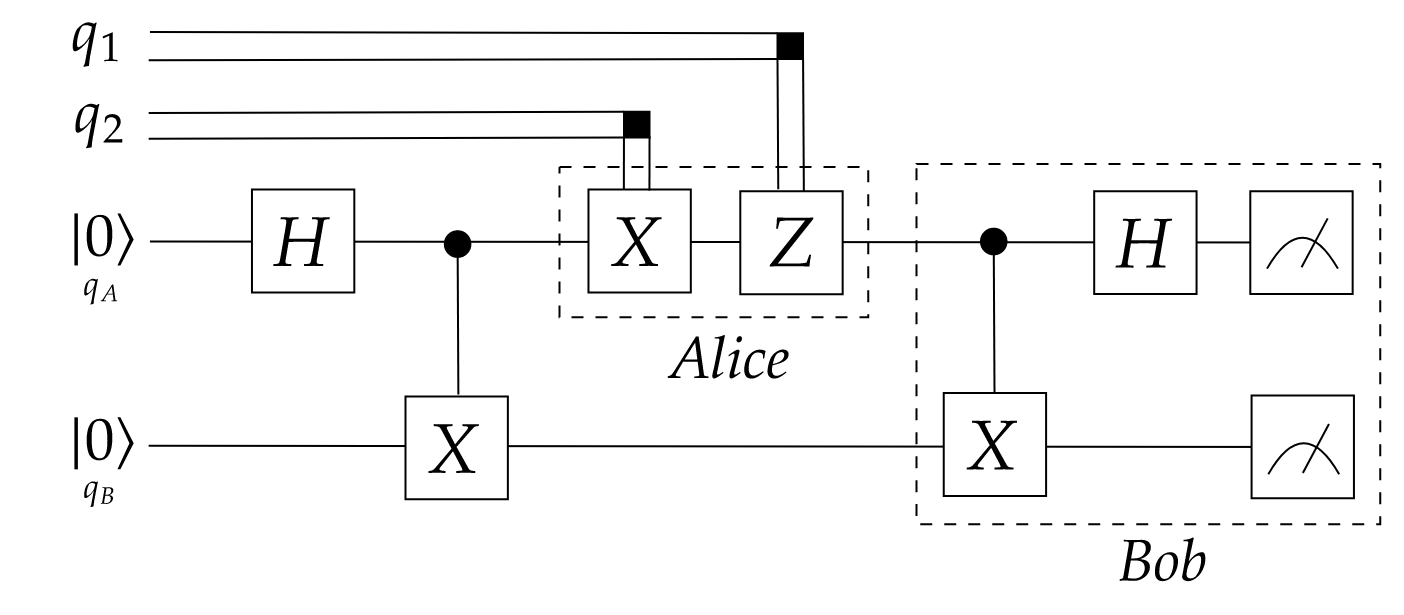

# Implementation of Superdense Coding

Now, we move on to constructing this circuit using Qiskit.

## When $q_1 = 1, q_2 = 1$

First, we prepare the quantum register. As we can see, from the circuit, the quantum register comprises of 2 qubits. Hence

In [7]:
# Prepare the quantum register
qr = QuantumRegister(2)

Next, we shall prepare the classical register which will have the classical output after measurement. Since the circuit only requires measuring two qubits, the classical register requires only 2 bits. So 

In [8]:
# Prepare the classical register
cr = ClassicalRegister(2)

Combining both the quantum and classical registers, we now define the quantum circuit

In [9]:
# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

Now, we shall start applying the gates.

The first step is to prepare the Bell state between the qubits.


In [10]:
# Apply Hadamard gate on qubit 0
qc.h(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

Since $q_1$ and $q_2$ are both $1$, we apply an $X$ gate followed by a $Z$ gate on the first qubit.

In [11]:
# Apply X gate on qubit 0
qc.x(0)

# Apply Z gate on qubit 0
qc.z(0)

Now, it's Bob's turn. Bob applies a $CNOT$ gate followed by a Hadamard gate on the first qubit. 

In [12]:
# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply Hadamard gate on qubit 0
qc.h(0)

Finally, let's measure both the qubits.

In [13]:
# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 1)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

Measurement result: {'11': 1}


As expected, the output is $11$. Let's take a look at the circuit we have built so far.

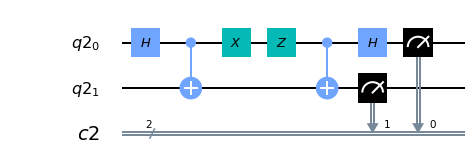

In [ ]:
# Display circuit
qc.draw(output = "mpl")

Now, let's run this circuit $100$ times and see if it always results in $11$.

In [ ]:
# Prepare the quantum register
qr = QuantumRegister(2)

# Prepare the classical register
cr = ClassicalRegister(2)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply X gate on qubit 0
qc.x(0)

# Apply Z gate on qubit 0
qc.z(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Measure qubits 0,1
qc.measure(0, 0)
qc.measure(1, 1)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

Measurement result: {'11': 100}


Again, as expected the result is always $11$. 

## When $q_1 = 1, q_2 = 0$

The code snippet given below runs a superdense coding protocol when $q_1 = 1, q_2 = 0$ 100 times.

Measurement result: {'10': 100}


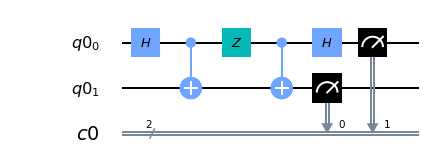

In [3]:
# Prepare the quantum register
qr = QuantumRegister(2)

# Prepare the classical register
cr = ClassicalRegister(2)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply Z gate on qubit 0
qc.z(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

Note that in Qiskit the result is read from right to left. As expected the result is always $10$.  

## When $q_1 = 0, q_2 = 1$

The code snippet given below runs a superdense coding protocol when $q_1 = 0, q_2 = 1$ 100 times.

Measurement result: {'01': 100}


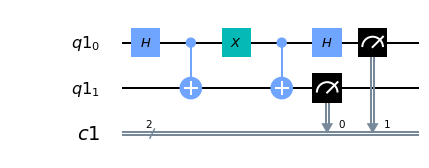

In [4]:
# Prepare the quantum register
qr = QuantumRegister(2)

# Prepare the classical register
cr = ClassicalRegister(2)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply X gate on qubit 0
qc.x(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

Note that in Qiskit the result is read from right to left. As expected the result is always $01$.  

## When $q_1 = 0, q_2 = 0$

The code snippet given below runs a superdense coding protocol when $q_1 = 0, q_2 = 0$ 100 times.

Measurement result: {'00': 100}


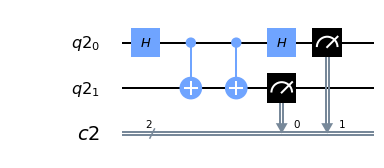

In [5]:
# Prepare the quantum register
qr = QuantumRegister(2)

# Prepare the classical register
cr = ClassicalRegister(2)

# Prepare the quantum circuit
qc = QuantumCircuit(qr, cr)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply CNOT gate controlled on qubit q0 and targetted on qubit q1
qc.cnot(0,1)

# Apply Hadamard gate on qubit 0
qc.h(0)

# Measure qubits 0,1
qc.measure(0, 1)
qc.measure(1, 0)
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend, shots = 100)
sim_result = job_sim.result()
counts = sim_result.get_counts(qc)

# Display measurement results
print("Measurement result: {}".format(counts))

# Display circuit
qc.draw(output = "mpl")

As expected the result is always $00$. It's pretty clear from the circuit why the result is always $00$. 